In [284]:
from scipy.stats import norm
import pandas as pd
import numpy as np

# WEEK_Days = 7
# MONTH_Days = 31
# YEAR_Days = 365

WEEK_Days = 5
MONTH_Days = 21
YEAR_Days = 256

Trading_Capital = 10_0000

Exp_Sharpe = 0.5
Annual_Vol = 50 / 100
Exp_Return = Exp_Sharpe * Annual_Vol

Daily_Vol = Annual_Vol / YEAR_Days ** 0.5
Daily_Return = Exp_Return / YEAR_Days
print('daily return process: mean={} std={}'.format(Daily_Return, Daily_Vol))

'''assumption: distribution & gaussian'''
rv = norm(loc=Daily_Return, scale=Daily_Vol)
samples = pd.Series(rv.rvs(10000 * YEAR_Days))
year_returns = []
for year_sample in np.array_split(samples, len(samples) / YEAR_Days):
    year_returns.append(pd.Series(year_sample).cumsum().iloc[-1])
pd.Series(year_returns).describe()

daily return process: mean=0.0009765625 std=0.03125


count    10000.000000
mean         0.246238
std          0.500009
min         -2.001218
25%         -0.087104
50%          0.244829
75%          0.582947
max          1.951619
dtype: float64

In [283]:
Period = MONTH_Days
worst_daliy_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital + Trading_Capital * return_path.cumsum()])
    worst_daliy_loss_each_period.append(capital_path.diff().min())
print(pd.Series(worst_daliy_loss_each_period).mean())

-5811.715409711018


In [282]:
Period = YEAR_Days
worst_weekly_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital +  Trading_Capital * return_path.cumsum()])
    worst_weekly_loss_each_period.append(capital_path[::WEEK_Days].diff().min())
print(pd.Series(worst_weekly_loss_each_period).mean())

-15210.43746428586


In [281]:
Period = 10 * YEAR_Days
worst_monthy_loss_each_period = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital + Trading_Capital * return_path.cumsum()])
    worst_monthy_loss_each_period.append(capital_path[::MONTH_Days].diff().min())
print(pd.Series(worst_monthy_loss_each_period).mean())

-34832.72261070409


In [244]:
Period = 1 * YEAR_Days

end_of_period_capital = []
for _ in range(5000):
    return_path = pd.Series(rv.rvs(size=Period))
    capital_path = pd.concat([pd.Series([Trading_Capital]), Trading_Capital * (return_path + 1).cumprod()])
    end_of_period_capital.append(capital_path.iloc[-1])

(pd.Series(end_of_period_capital) < Trading_Capital * 1).sum() / 5000

0.601

/Users/weiranzhou/Code/pysystemtrade/sysobjects/futures_per_contract_prices.py:33: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self._as_df = price_data_as_df


<AxesSubplot:xlabel='index'>

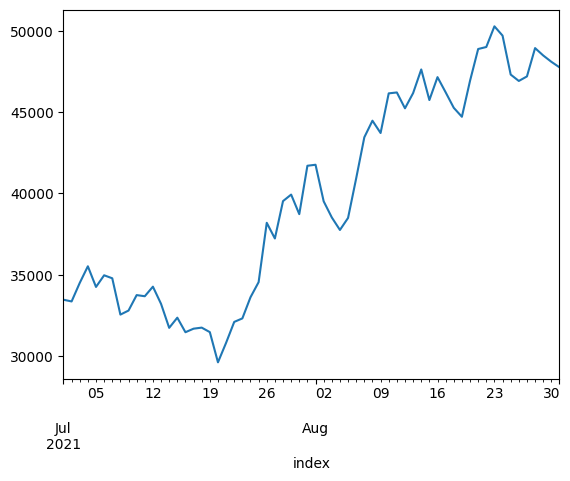

In [324]:
import pandas as pd
from paper.sysdata.sim.db_perpetuals_sim_data import dbPerpetualsSimData

price = dbPerpetualsSimData().daily_prices('BTC-USDT-SWAP')
price[(price.index.year == 2021) & (price.index.month <= 8) & ((price.index.month >= 7))].plot()

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


,mac2,mac4,mac8
mac2,1.000000,0.927279,0.616911
mac4,0.927279,1.000000,0.790885
mac8,0.616911,0.790885,1.000000


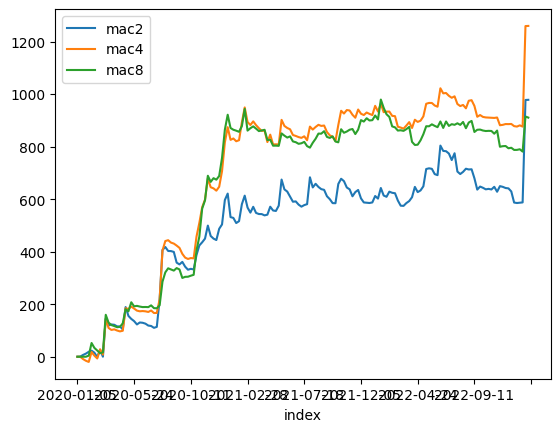

In [333]:
import pandas as pd
from itables import show

vol = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/tmp.csv', index_col=0)
vol[['mac2','mac4','mac8']].cumsum().plot()
vol[['mac2','mac4','mac8']].corr()

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date,rule'>

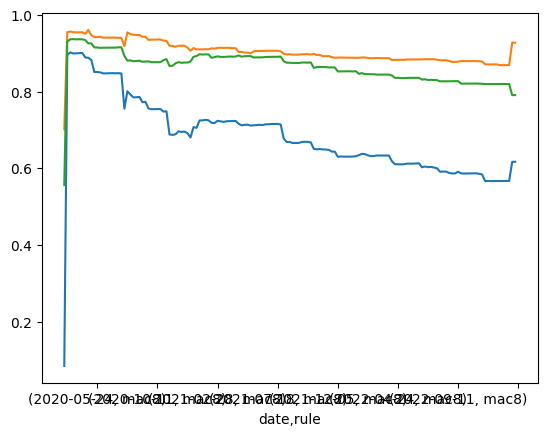

In [353]:
import pandas as pd
from itables import show

df = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/raw_corr.csv', index_col=[0,1])
df.index.names = ['date', 'rule']
df.query('rule == "mac2"')['mac8'].plot()
df.query('rule == "mac2"')['mac4'].plot()
df.query('rule == "mac8"')['mac4'].plot()


In [129]:
import pandas as pd
from itables import show

def select(se, st, et):
    return se[(se.index>=st) & (se.index<=et)]

forecast = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/fore.csv', index_col=[0]).iloc[:, 0].rename('fos')
vol_scalar = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/vol_sca.csv', index_col=[0]).iloc[:, 0].rename('vol_scalar')
vol = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/vol.csv', index_col=[0]).iloc[:, 0].rename('vol')
perc_vol = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/vol.csv', index_col=[0]).iloc[:, 0].rename('perc_vol')
pos = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/pos.csv', index_col=[0]).iloc[:, 0].rename('pos')
pri = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/pri.csv', index_col=[0]).iloc[:, 0].rename('pri')

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='index'>

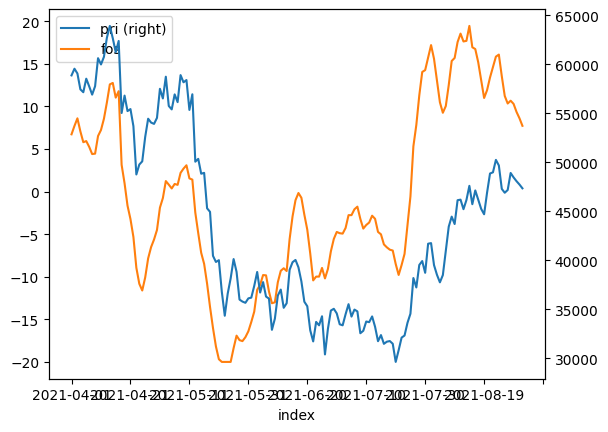

In [130]:
df = pd.concat([pri, forecast], axis=1)
df = select(df, '2021-04-01', '2021-09-01')
df.plot(secondary_y='pri')

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='index'>

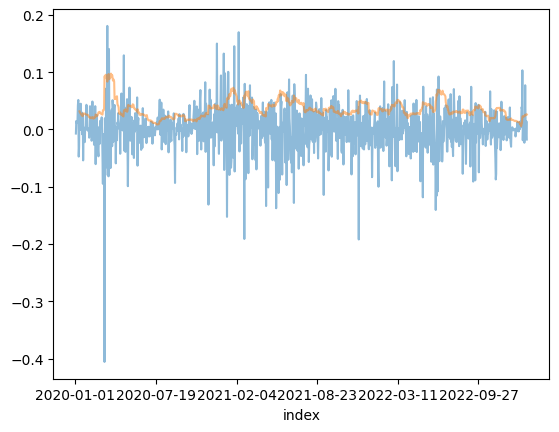

In [96]:
denom_pri = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/denom_price.csv', index_col=[0]).iloc[:, 0].rename('denom_price')
# (denom_pri.diff() / denom_pri).plot(alpha=0.5)

daily_returns = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/daily_returns.csv', index_col=[0]).iloc[:, 0].rename('daily_returns')
(daily_returns/denom_pri).plot(alpha=0.5)

daily_returns_volatility = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/daily_returns_volatility.csv', index_col=[0]).iloc[:, 0].rename('daily_returns_volatility')
(daily_returns_volatility/denom_pri).plot(alpha=0.5)

2.4603750000000004
3.048625


/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


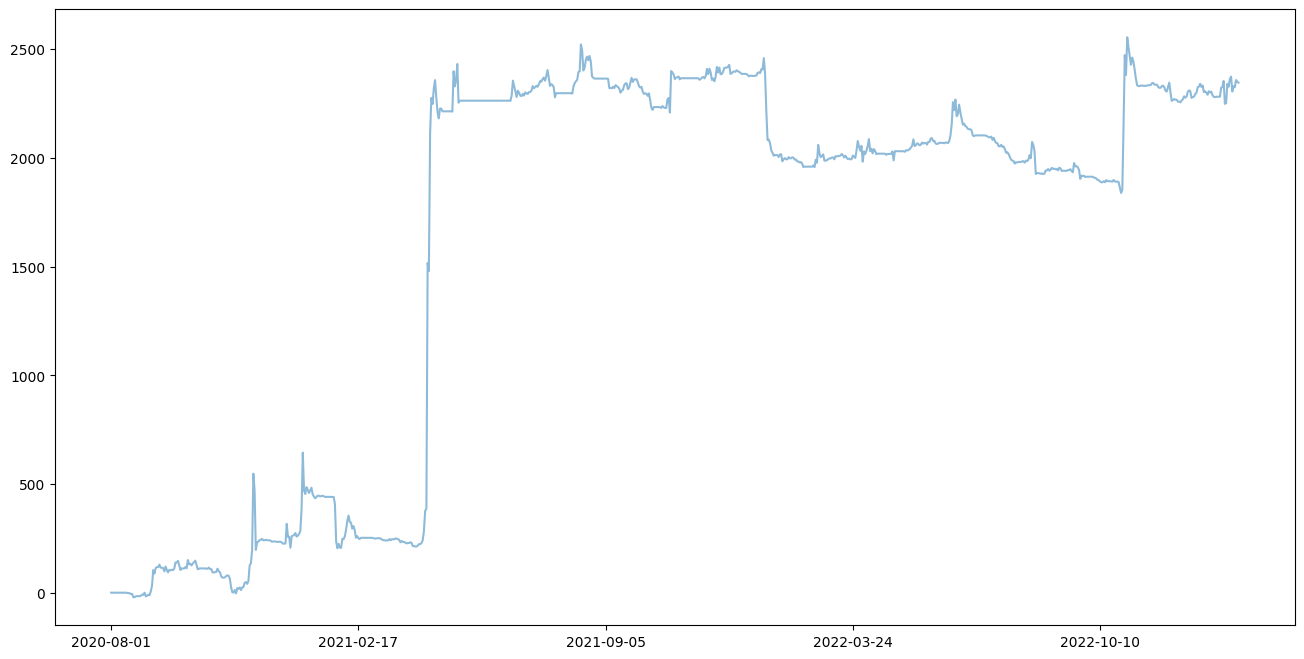

In [7]:
import pandas as pd
from itables import show

def select(se, st, et):
    return se[(se.index>=st) & (se.index<=et)]

nets = []
for ins in ['BTC-USDT-SWAP', 'ETH-USDT-SWAP', 'BNB-USDT', 'DOGE-USDT-SWAP']:
    gross = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/{}-net.csv'.format(ins), index_col=[0]).iloc[:, 0].rename(ins).cumsum()
    nets.append(gross)
# df = pd.concat(nets[1], axis=1)
df = nets[3]
# df.loc[:, 'sum']  = df.iloc[:, 1:].sum(axis=1).rename('sum') / 5
# df = select(df, '2021-02', '2022-02')
df.plot(figsize=(16, 8), alpha=0.5)

print(1.35**3)
print(1.45**3)

index
2020-02-10     25.053
2020-02-11     24.801
2020-02-12     25.819
2020-02-13     25.302
2020-02-14     25.366
               ...   
2023-01-26    304.900
2023-01-27    304.730
2023-01-28    307.210
2023-01-29    309.720
2023-01-30        NaN
Name: FINAL, Length: 1086, dtype: float64

/opt/homebrew/Caskroom/miniconda/base/envs/trading/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='index'>

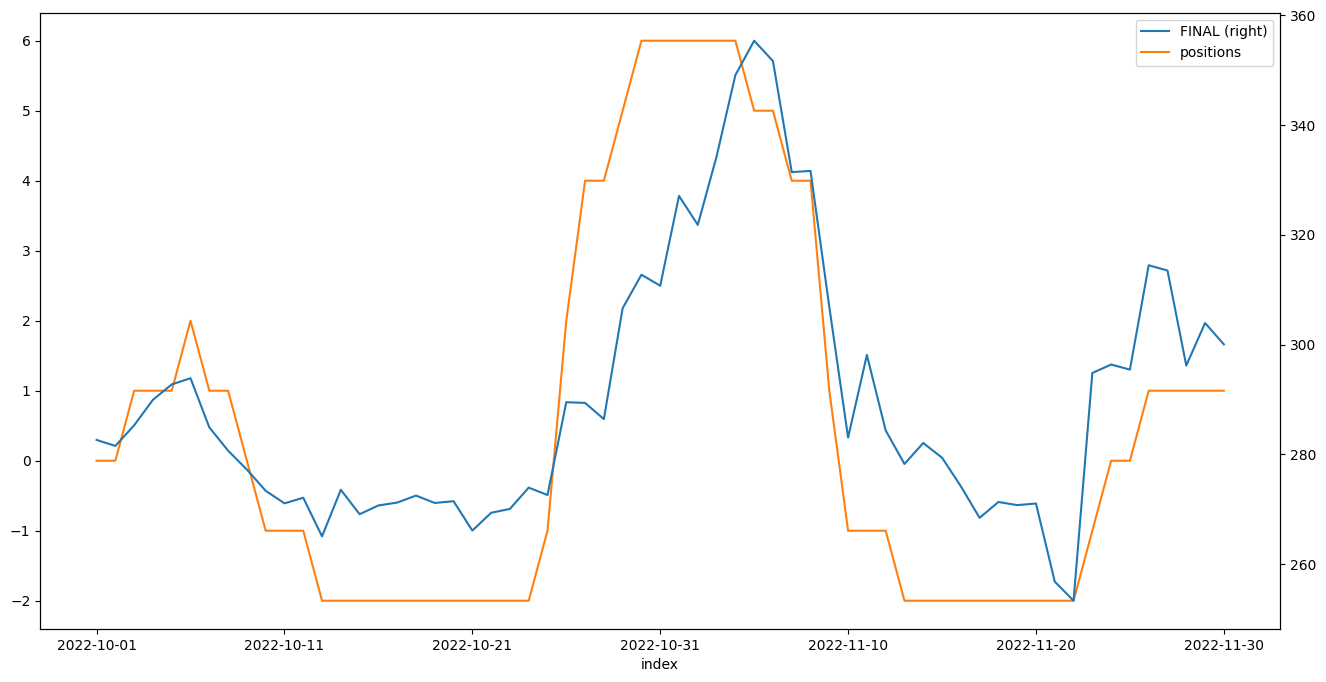

In [245]:
net = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/BNB-USDT-net.csv', index_col=[0]).iloc[:, 0].cumsum(axis=0).rename('net')
positions = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/BNB-USDT-positions.csv', index_col=[0]).iloc[:, 0].rename('positions')
vol_scalar = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/BNB-USDT-vol_scalar.csv', index_col=[0]).iloc[:, 0].rename('vol_scalar')
forecast = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/BNB-USDT-forecast.csv', index_col=[0]).iloc[:, 0].rename('forecast')

# gross.sum(axis=1).plot()
price = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/bnb-price.csv', index_col=[0]).iloc[:, 0]
display(price)
df = pd.concat([price, positions], axis=1)
df = select(df, '2022-10-01', '2022-11-31')
df.plot(secondary_y='FINAL', figsize=(16, 8))


In [250]:
net = pd.read_csv(r'/Users/weiranzhou/Code/pysystemtrade/portfolio.csv', index_col=[0])#.cumsum(axis=0)
display(net.tail(30))
# net.dropna().sum(axis=1).plot()

,BNB-USDT,BTC-USDT-SWAP,ETH-USDT-SWAP
2023-01-01,1.910000,0.436000,0.198000
2023-01-02,-3.440000,-2.177000,-2.127000
2023-01-03,1.120000,0.149000,-0.038000
2023-01-04,-9.170000,-1.478000,-3.566203
2023-01-05,-2.245663,0.432332,-0.098184
2023-01-06,0.000000,0.000000,-0.179000
2023-01-07,0.000000,0.000000,1.509000
2023-01-08,-0.178226,0.000000,-0.234121
2023-01-09,15.960000,-0.133699,9.320000
2023-01-10,-1.878796,0.386615,3.505420


In [256]:
a = 0.40546266625766675 * 309.72
b = 1.0734519656249923 *  1590.59 * 0.1
c = 2.930274345402926 * 23172.1 * 0.01
print(a,b,c)
print(c / (a + b))
5.730601391282793  / 2

2.726996990708156 * 2

125.57989699332455 170.74219620034566 679.0061015911114
2.291446089196348


5.453993981416312